## Exercise 3 - Minimal paths again (Bonus)

---

```python
Auther = 'Yubo Cai'
Email = 'yubo.cai@polytechnique.edu'

-------------------------------

List of Work: Exercise 3
- Question 1 - problem finished
- Question 2 - problem finished
```

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

**Question 1**

**(Path of a light beam)** It is known that the light always follows the fastest path when traveling between two points. However, its speed is influenced by the medium in which it travels. Suppose that the speed of light in is $v_{a}=299700000$ meters per second. It is known that light travels slower in water and the speed of light in water is about 1.3 smaller than $v_{a}$. 

Suppose you have a light bulb at the point $(0,1)$ and the water level is the line $y=0$. Draw the path of the light from $(0,1)$ to various points on the line $y=-1$.

A person looks to the water from the point $(0,1)$ and looks at an object modeled by the segment $[1,2] \times\{-1\}$. What is the apparent position of the object at the surface of the water?

</div>

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer to Question 1</td>
</tr>
</table>

---

We build the model of the light beam. We denote the point in $y=-1$ is $A(a,-1)$ and the point in $y=0$ is $B(x,0)$. The light beam is the path from $(0,1)$ to $B$ and from $B$ to $A$. We have the condition that $x \in [0, m)$. Since the whole model is symmetric, we only consider $x \in [0, \infty)$.

We have the following equations:
$$
distance = \sqrt{x^2 + 1} + \sqrt{(a-x)^2 + 1}
$$
However, the time of the light beam is the distance divided by the speed of light. We have the following equations:
$$
T = \frac{\sqrt{x^2 + 1}}{v_a} + \frac{1.3\sqrt{(a-x)^2 + 1}}{v_a} = \frac{\sqrt{x^2 + 1} + 1.3 \sqrt{(a-x)^2 + 1}}{v_a}
$$
Then we try to minimize the time $T= \sqrt{x^2 + 1} + 1.3 \sqrt{(a-x)^2 + 1}$, we take the derivative of $T$ with respect to $x$ and set it to zero:
$$
\frac{d T}{d x}=\frac{x}{\sqrt{x^2+1}}-1.3 \frac{a-x}{\sqrt{(a-x)^2+1}}=0
$$
Following part, we can use python to solve the equation and plot the path of the light beam.

---

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sym
from math import *

In [52]:
from scipy.optimize import minimize_scalar

def f(x, a):
    return sqrt(x**2 + 1) + 1.3 * sqrt((a-x)**2 + 1)

a = 4  # example value
res = minimize_scalar(lambda x: f(x, a), method='bounded', bounds=(0, a))
x_opt = res.x
print(res)

     fun: 4.999848245327537
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 2.9375225408799914


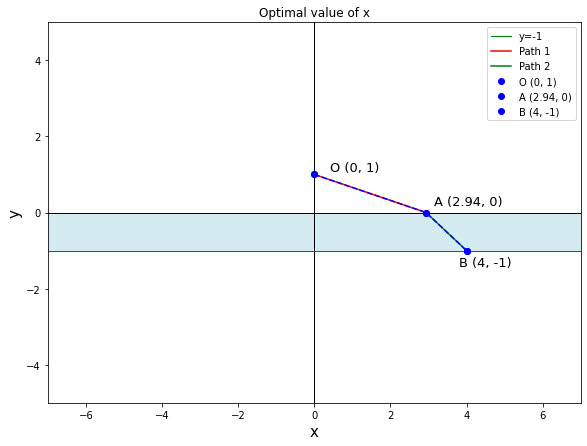

In [78]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.title('Optimal value of x')
ax.set_xlim([-7, 7])
ax.set_ylim([-5, 5])

ax.axhline(y=0, color='black', linewidth=1)
ax.axvline(x=0, color='black', linewidth=1)
ax.axhline(y=-1, color='green', linewidth=1, label='y=-1')
ax.axhspan(-1, 0.0, facecolor='lightblue', alpha=0.5)

ax.plot([0, x_opt], [1, 0], 'r', label='Path 1')  # path from (0,1) to (x,0)
ax.plot([x_opt, a], [0, -1], 'g', label='Path 2')  # path from (x,0) to (a,-1)
ax.plot(*point1, 'bo', label='O (0, 1)')  # point (0,1)
ax.plot(*point2, 'bo', label="A ({:.2f}, 0)".format(x_opt))  # point (x,0)
ax.plot(*point3, 'bo', label="B ({}, -1)".format(a))  # point (a,-1)
ax.text(0.4, 1.1, "O (0, 1)", fontsize=13)
ax.text(x_opt + 0.2, 0.2, "A ({:.2f}, 0)".format(x_opt), fontsize=13)
ax.text(a - 0.2, -1.4, "B ({}, -1)".format(a), fontsize=13)
xlabel = ax.set_xlabel('x', fontsize=15)
ylabel = ax.set_ylabel('y', fontsize=15)
ax.plot([point1[0], point2[0], point3[0]], [point1[1], point2[1], point3[1]],
        'bo--')  # connecting lines
ax.set_aspect('equal')
ax.legend()
plt.show()

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

**Question 2**

Frodo and Sam need to travel 100 leagues due East from point A to point B. On normal terrain, they can cover 10 leagues per day, and so the journey would take 10 days. However, their path is crossed by a long marsh which runs exactly South-West to North-East, and walking through the marsh will slow them down. The marsh is 50 leagues wide at all points, and the mid-point of AB is located in the middle of the marsh. A map of the region is shown in the diagram below:

![avatar](https://projecteuler.net/project/images/p607_marsh.png)

The marsh consists of 5 distinct regions, each 10 leagues across, as shown by the shading in the map. The strip closest to point A is relatively light marsh, and can be crossed at a speed of 9 leagues per day. However, each strip becomes progressively harder to navigate, the speeds going down to 8, 7, 6 and finally 5 leagues per day for the final region of marsh, before it ends and the terrain becomes easier again, with the speed going back to 10 leagues per day.

If Frodo and Sam were to head directly East for point B, they would travel exactly 100 leagues, and the journey would take approximately 13.4738 days. However, this time can be shortened if they deviate from the direct path.

Find the shortest possible time required to travel from point A to B, and give your answer in days, rounded to 10 decimal places.

</div>

In [107]:
from scipy.optimize import minimize
import numpy as np

L = 100 / np.sqrt(2)
P = (L - 50) / 2


def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)


def time(x):
    result = dist(0, 0, x[0], P) / 10
    result += dist(x[5], 0, L, P) / 10
    for i in range(5):
        result += dist(x[i], 0, x[i + 1], 10) / (9 - i)
    return result


x0 = [P + (10 / np.sqrt(2)) * i for i in range(6)]

# now we use gradient descent to minimize the time
res = minimize(time, x0, method='BFGS', options={'disp': True}, tol=1e-20)
print('--' * 20)
print('The optimal date is', "{0:.10f}".format(res.fun))

         Current function value: 13.126511
         Iterations: 55
         Function evaluations: 614
         Gradient evaluations: 86
----------------------------------------
The optimal date is 13.1265108586


In [152]:
# method without using the library
# minimize with gradient descent
import numpy as np


def duration(points):
    speed = [10, 9, 8, 7, 6, 5, 10]
    duration = 0
    for i in range(0, len(speed)):
        distance = ((points[i + 1, 0] - points[i, 0])**2 +
                    (points[i + 1, 1] - points[i, 1])**2)**0.5
        duration += distance / speed[i]
    return duration


def gradient_function(points):
    speed = [10, 9, 8, 7, 6, 5, 10]
    gradient = 0
    for i in range(0, len(speed)):
        gradient += ((points[i + 1, 0] - points[i, 0]) /
                     (speed[i] * ((points[i + 1, 0] - points[i, 0])**2 +
                                  (points[i + 1, 1] - points[i, 1])**2)**0.5))
    return gradient


def gradient_descent(points, delta):
    old_Duration = duration(points)
    new_Duration = old_Duration - delta * gradient_function(points)
    if myrand() > 0:
        delta = -delta
    id = int(random.random() * 6) + 1
    points[id, 0] += delta
    new_Duration = old_Duration - 1.05 * delta * gradient_function(points)
    if (duration(points) >= old_Duration):
        points[id, 0] -= delta
        new_Duration = old_Duration - 0.95 * delta * gradient_function(points)
    return new_Duration


def frange(start, stop, step):
    i = start
    while i >= stop:
        yield i
        i /= step
    return step


# Calculate the Minimum Days
def min_days():
    normal_terrain = ((100 / np.sqrt(2) - 50) / 2)
    marsh = 10.
    ini_xy = [
        0., normal_terrain, marsh, marsh, marsh, marsh, marsh, normal_terrain
    ]
    y_coords = []
    x_coords = []
    k = 0
    for i in range(0, len(ini_xy)):
        k += ini_xy[i]
        y_coords.append(k)
        x_coords.append(k)
    points = (np.stack((x_coords, y_coords), axis=-1))

    for delta in frange(1e-2, 1e-20, 10):
        for i in range(10000):
            gradient_descent(points, delta)
    min_days = gradient_descent(points, delta)
    return min_days, points


answer, points = min_days()
print('The optimal date is', "{0:.10f}".format(answer),
      'days with method of gradient descent')


The optimal date is 13.1265108586 days with method of gradient descent


In [181]:
# compute the total distance
def total_distance(points):
    distance = 0
    for i in range(0, len(points) - 1):
        distance += ((points[i + 1, 0] - points[i, 0])**2 +
                     (points[i + 1, 1] - points[i, 1])**2)**0.5
    return distance
  
print('The total distance is', "{0:.10f}".format(total_distance(points)))

The total distance is 102.1345806294


In [155]:
import pandas as pd
df = pd.DataFrame(points, columns=['y', 'x'])
df

,y,x
0,0.000000,0.000000
1,16.121184,10.355339
2,27.714991,20.355339
3,36.816454,30.355339
4,44.104148,40.355339
5,49.952299,50.355339
6,54.589479,60.355339
7,70.710678,70.710678


Then we take the original point as $A(0,0)$ and the destination point as $B(50\sqrt{2},50\sqrt{2})$. Then we can have the following graph, we rotate the graph by $45^{\circ}$ and then we can have the following graph:

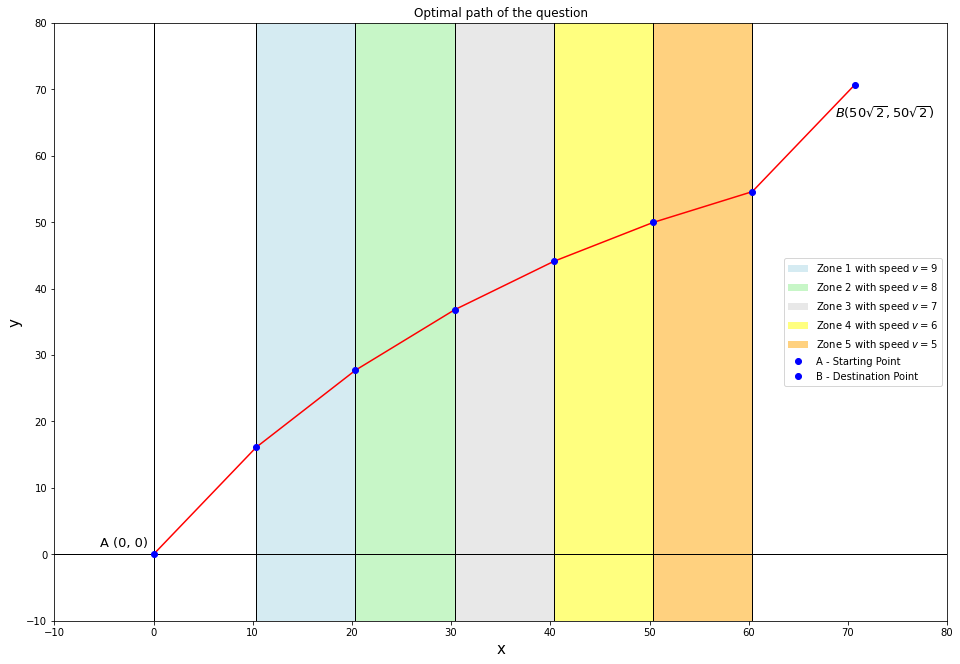

In [180]:
x = df['x'].values
y = df['y'].values

fig, ax = plt.subplots(figsize=(16, 11))
plt.title('Optimal path of the question')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
ax.set_xlim([-10, 80])
ax.set_ylim([-10, 80])

ax.axhline(y=0, color='black', linewidth=1)
ax.axvline(x=0, color='black', linewidth=1)
ax.axvline(x=x[1], color='black', linewidth=1)
ax.axvline(x=x[2], color='black', linewidth=1)
ax.axvline(x=x[3], color='black', linewidth=1)
ax.axvline(x=x[4], color='black', linewidth=1)
ax.axvline(x=x[5], color='black', linewidth=1)
ax.axvline(x=x[6], color='black', linewidth=1)
ax.axvspan(x[1], x[2], facecolor='lightblue', alpha=0.5, label=r'Zone 1 with speed $v=9$')
ax.axvspan(x[2], x[3], facecolor='lightgreen', alpha=0.5, label=r'Zone 2 with speed $v=8$')
ax.axvspan(x[3], x[4], facecolor='lightgrey', alpha=0.5, label=r'Zone 3 with speed $v=7$')
ax.axvspan(x[4], x[5], facecolor='yellow', alpha=0.5, label=r'Zone 4 with speed $v=6$')
ax.axvspan(x[5], x[6], facecolor='orange', alpha=0.5, label=r'Zone 5 with speed $v=5$')

ax.plot([0, x[1]], [0, y[1]], 'r')
ax.plot([x[1], x[2]], [y[1], y[2]], 'r')
ax.plot([x[2], x[3]], [y[2], y[3]], 'r')
ax.plot([x[3], x[4]], [y[3], y[4]], 'r')
ax.plot([x[4], x[5]], [y[4], y[5]], 'r')
ax.plot([x[5], x[6]], [y[5], y[6]], 'r')
ax.plot([x[6], x[7]], [y[6], y[7]], 'r')

ax.plot(0, 0, 'bo', label='A - Starting Point')
ax.plot(x[1], y[1], 'bo')
ax.plot(x[2], y[2], 'bo')
ax.plot(x[3], y[3], 'bo')
ax.plot(x[4], y[4], 'bo')
ax.plot(x[5], y[5], 'bo')
ax.plot(x[6], y[6], 'bo')
ax.plot(x[7], y[7], 'bo', label='B - Destination Point')

ax.text(-5.4, 1.1, "A (0, 0)", fontsize=13)
ax.text(x[7] - 2, y[7] - 5, r'$B (50\sqrt{2}, 50\sqrt{2})$', fontsize=13)

ax.legend()
plt.show()
